In [1]:
import pandas as pd
import matplotlib
from pandas import DataFrame
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter


In [2]:
#dataset references https://www.kaggle.com/datasets/sootersaalu/amazon-top-50-bestselling-books-2009-2019
bestsellers= pd.read_csv('bestsellers\\bestsellers with categories.csv')

In [3]:
bestsellers.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [4]:
bestsellers.tail()

,Name,Author,User Rating,Reviews,Price,Year,Genre
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction
549,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2019,Non Fiction


In [5]:
#dataframe shape and size
bs_shape= bestsellers.shape
print(f'The DataFrame is {bs_shape[0]} rows by {bs_shape[1]} columns \n')
print (bestsellers.info())

The DataFrame is 550 rows by 7 columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB
None


In [6]:
#are we missing any data?
print(bestsellers.isnull().any().any())

False


In [7]:
#What are our columns called?
bestsellers.columns

Index(['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre'], dtype='object')

In [8]:
bestsellers['Genre'].value_counts()

Genre
Non Fiction    310
Fiction        240
Name: count, dtype: int64

In [9]:
bestsellers['User Rating'].value_counts()

User Rating
4.8    127
4.7    108
4.6    105
4.5     60
4.9     52
4.4     38
4.3     25
4.0     14
4.2      8
4.1      6
3.9      3
3.8      2
3.6      1
3.3      1
Name: count, dtype: int64

In [32]:
pd.options.display.float_format = '{:,.2f}'.format
bestsellers.describe()


,User Rating,Reviews,Price,Year
count,550.00,550.00,550.00,550.00
mean,4.62,"11,953.28",13.10,"2,014.00"
std,0.23,"11,731.13",10.84,3.17
min,3.30,37.00,0.00,"2,009.00"
25%,4.50,"4,058.00",7.00,"2,011.00"
50%,4.70,"8,580.00",11.00,"2,014.00"
75%,4.80,"17,253.25",16.00,"2,017.00"
max,4.90,"87,841.00",105.00,"2,019.00"


In [11]:
#Time to clean it up!
def clean_bs(bestsellers) -> pd.DataFrame:
    bestsellers.columns = bestsellers.columns.str.title()
    bestsellers.columns = bestsellers.columns.str.strip().str.replace('/', ' ')


    return bestsellers

In [12]:
#Squeaky clean data!
bestsellers_cleaned= clean_bs(bestsellers)
bestsellers_cleaned.head(2)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction


In [13]:
def filter_by_Genre(bestsellers: DataFrame, Genre: str) -> DataFrame:
    return bestsellers[bestsellers['Genre'] == Genre]

In [14]:
fiction= filter_by_Genre(bestsellers_cleaned, "Fiction")
non_fiction = filter_by_Genre(bestsellers_cleaned, "Non Fiction")
non_fiction.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
8,"A Higher Loyalty: Truth, Lies, and Leadership",James Comey,4.7,5983,3,2018,Non Fiction
11,A Patriot's History of the United States: From...,Larry Schweikart,4.6,460,2,2010,Non Fiction


In [15]:
bestsellers_sorted_fiction = fiction.groupby(['Year']).Genre.count()
bestsellers_sorted_nonfiction =non_fiction.groupby(['Year']).Genre.count()
print(bestsellers_sorted_fiction)
print (bestsellers_sorted_nonfiction)


Year
2009    24
2010    20
2011    21
2012    21
2013    24
2014    29
2015    17
2016    19
2017    24
2018    21
2019    20
Name: Genre, dtype: int64
Year
2009    26
2010    30
2011    29
2012    29
2013    26
2014    21
2015    33
2016    31
2017    26
2018    29
2019    30
Name: Genre, dtype: int64


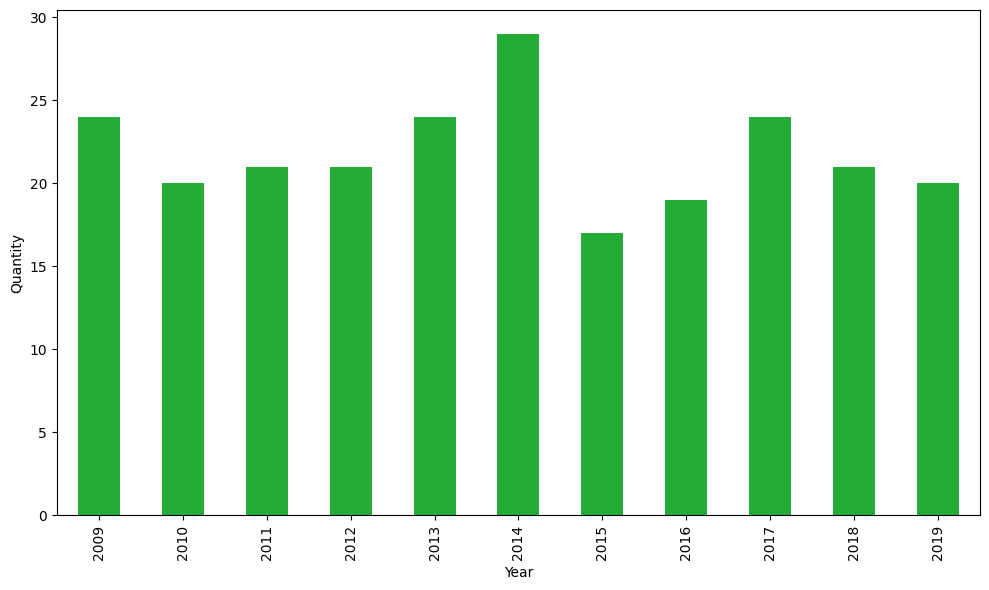

In [16]:
bestsellers_sorted_fiction.plot(
    kind='bar', 
    x= 'Price', 
    y='Year', 
    rot='vertical', 
    color='#24ab38', 
    figsize=(10,6)
).set(
    xlabel='Year', 
    ylabel='Quantity'
)

plt.tight_layout()  # Adjust layout to avoid overlapping labels
plt.show()          # Display the plot

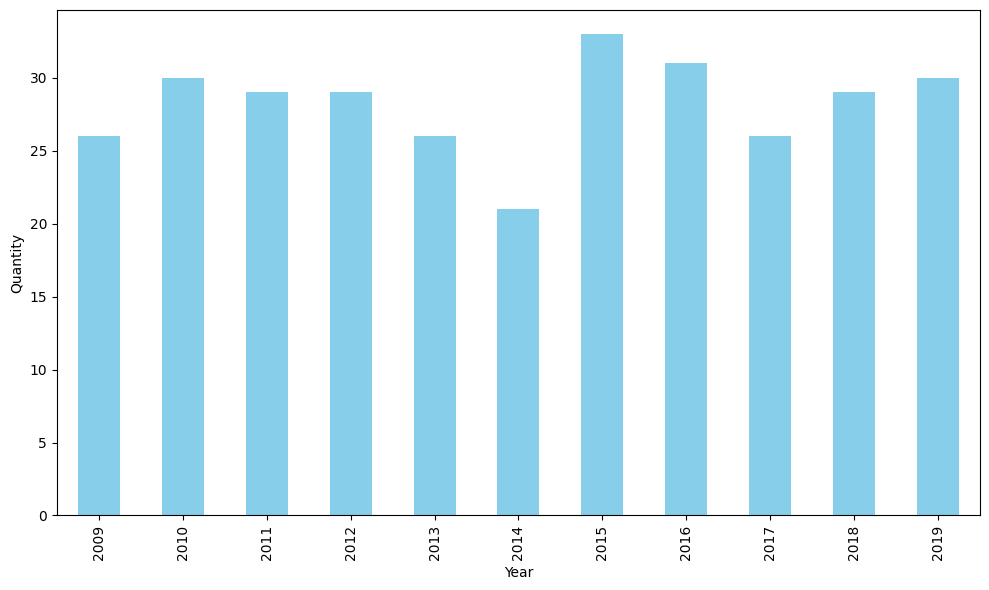

In [17]:
bestsellers_sorted_nonfiction.plot(
    kind='bar', 
    x='Genre', 
    y='Year', 
    rot='vertical', 
    color='#87CEEB', 
    figsize=(10,6)
).set(
    xlabel='Year', 
    ylabel='Quantity'
)
plt.tight_layout()  # Adjust layout to avoid overlapping labels
plt.show()          # Display the plot

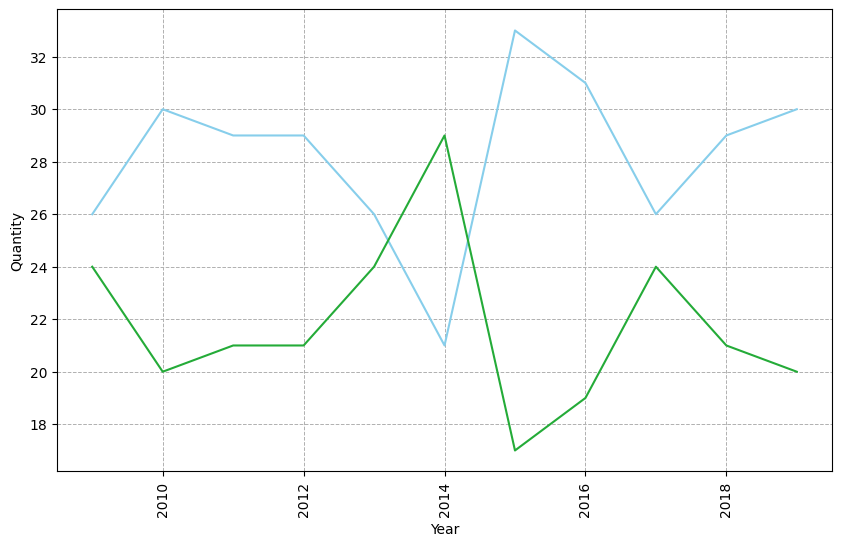

In [18]:
bestsellers_sorted_nonfiction.plot(
    x='Year', 
    y='Genre', 
    kind='line', 
    rot= 'vertical',
    color= '#87CEEB',
    figsize= (10,6)
    ).set(xlabel= 'Year', ylabel='Quantity')

bestsellers_sorted_fiction.plot(
    x='Year', 
    y='Genre', 
    kind='line', 
    rot= 'vertical',
    color= '#24ab38',
    figsize= (10,6)
    ).set(xlabel= 'Year', ylabel='Quantity')

plt.grid(True, which='both', linestyle='--', linewidth=0.7)

plt.show()


In [20]:
bestsellers_cleaned.Author.value_counts()

Author
Jeff Kinney                           12
Gary Chapman                          11
Rick Riordan                          11
Suzanne Collins                       11
American Psychological Association    10
                                      ..
Keith Richards                         1
Chris Cleave                           1
Alice Schertle                         1
Celeste Ng                             1
Adam Gasiewski                         1
Name: count, Length: 248, dtype: int64

In [24]:
bestsellers_cleaned.loc[bestsellers.Author=='Jeff Kinney']

,Name,Author,User Rating,Reviews,Price,Year,Genre
42,"Cabin Fever (Diary of a Wimpy Kid, Book 6)",Jeff Kinney,4.8,4505,0,2011,Fiction
71,"Diary of a Wimpy Kid: Hard Luck, Book 8",Jeff Kinney,4.8,6812,0,2013,Fiction
72,Diary of a Wimpy Kid: The Last Straw (Book 3),Jeff Kinney,4.8,3837,15,2009,Fiction
73,Diary of a Wimpy Kid: The Long Haul,Jeff Kinney,4.8,6540,22,2014,Fiction
80,"Dog Days (Diary of a Wimpy Kid, Book 4) (Volum...",Jeff Kinney,4.8,3181,12,2009,Fiction
88,Double Down (Diary of a Wimpy Kid #11),Jeff Kinney,4.8,5118,20,2016,Fiction
253,Old School (Diary of a Wimpy Kid #10),Jeff Kinney,4.8,6169,7,2015,Fiction
381,The Getaway,Jeff Kinney,4.8,5836,0,2017,Fiction
435,The Meltdown (Diary of a Wimpy Kid Book 13),Jeff Kinney,4.8,5898,8,2018,Fiction
468,"The Third Wheel (Diary of a Wimpy Kid, Book 7)",Jeff Kinney,4.7,6377,7,2012,Fiction


In [22]:
bestsellers_cleaned.Name.value_counts()

Name
Publication Manual of the American Psychological Association, 6th Edition       10
StrengthsFinder 2.0                                                              9
Oh, the Places You'll Go!                                                        8
The Very Hungry Caterpillar                                                      7
The 7 Habits of Highly Effective People: Powerful Lessons in Personal Change     7
                                                                                ..
Humans of New York : Stories                                                     1
Howard Stern Comes Again                                                         1
Homebody: A Guide to Creating Spaces You Never Want to Leave                     1
Have a Little Faith: A True Story                                                1
Night (Night)                                                                    1
Name: count, Length: 351, dtype: int64

In [30]:
bestsellers_cleaned.loc[bestsellers.Author== 'American Psychological Association']

,Name,Author,User Rating,Reviews,Price,Year,Genre
271,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2009,Non Fiction
272,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2010,Non Fiction
273,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2011,Non Fiction
274,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2012,Non Fiction
275,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2013,Non Fiction
276,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2014,Non Fiction
277,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2015,Non Fiction
278,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2016,Non Fiction
279,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2017,Non Fiction
280,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2018,Non Fiction


In [33]:
bestsellers_cleaned.loc[bestsellers.Year== 2009]


,Name,Author,User Rating,Reviews,Price,Year,Genre
14,"Act Like a Lady, Think Like a Man: What Men Re...",Steve Harvey,4.60,5013,17,2009,Non Fiction
25,Arguing with Idiots: How to Stop Small Minds a...,Glenn Beck,4.60,798,5,2009,Non Fiction
38,"Breaking Dawn (The Twilight Saga, Book 4)",Stephenie Meyer,4.60,9769,13,2009,Fiction
50,Crazy Love: Overwhelmed by a Relentless God,Francis Chan,4.70,1542,14,2009,Non Fiction
60,Dead And Gone: A Sookie Stackhouse Novel (Sook...,Charlaine Harris,4.60,1541,4,2009,Fiction
72,Diary of a Wimpy Kid: The Last Straw (Book 3),Jeff Kinney,4.80,3837,15,2009,Fiction
78,Divine Soul Mind Body Healing and Transmission...,Zhi Gang Sha,4.60,37,6,2009,Non Fiction
80,"Dog Days (Diary of a Wimpy Kid, Book 4) (Volum...",Jeff Kinney,4.80,3181,12,2009,Fiction
91,Eat This Not That! Supermarket Survival Guide:...,David Zinczenko,4.50,720,1,2009,Non Fiction
92,"Eat This, Not That! Thousands of Simple Food S...",David Zinczenko,4.30,956,14,2009,Non Fiction
